# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [1]:
# Import the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()

True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [3]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [4]:
# The monthly amount for the member's household income
# YOUR CODE HERE
monthly_income = 12000


#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [5]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [6]:
# Using the Python requests library, make an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()


# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(btc_response, indent=4, sort_keys=True))


{
    "data": {
        "1": {
            "circulating_supply": 18693093,
            "id": 1,
            "last_updated": 1619574774,
            "max_supply": 21000000,
            "name": "Bitcoin",
            "quotes": {
                "USD": {
                    "market_cap": 1039064354098,
                    "percent_change_1h": 0.452268258758189,
                    "percent_change_24h": 3.48580134493029,
                    "percent_change_7d": -1.25594449858703,
                    "percentage_change_1h": 0.452268258758189,
                    "percentage_change_24h": 3.48580134493029,
                    "percentage_change_7d": -1.25594449858703,
                    "price": 55588.0,
                    "volume_24h": 48838708892
                }
            },
            "rank": 1,
            "symbol": "BTC",
            "total_supply": 18693093,
            "website_slug": "bitcoin"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrenci

In [7]:
# Using the Python requests library, make an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
print(json.dumps(eth_response, indent=4, sort_keys=True))

{
    "data": {
        "1027": {
            "circulating_supply": 115648182,
            "id": 1027,
            "last_updated": 1619574798,
            "max_supply": 0,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 312968477927,
                    "percent_change_1h": 0.71392940722934,
                    "percent_change_24h": 7.88620558764018,
                    "percent_change_7d": 16.5045919194881,
                    "percentage_change_1h": 0.71392940722934,
                    "percentage_change_24h": 7.88620558764018,
                    "percentage_change_7d": 16.5045919194881,
                    "price": 2707.9,
                    "volume_24h": 38741469524
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 115648182,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "num_cryptocurrencies"

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [8]:
# Navigate the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']


# Print the current price of BTC
# YOUR CODE HERE
print(f"The price for Bitcoin is ${btc_price}")

The price for Bitcoin is $55588.0


In [9]:
# Navigate the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Print the current price of ETH
# YOUR CODE HERE
print(f"The price for the Ethereum is ${eth_price}")

The price for the Ethereum is $2707.9


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [10]:
# Compute the current value of the BTC holding 
btc_value = btc_coins * btc_price # YOUR CODE HERE

# Print current value of your holding in BTC
# YOUR CODE HERE
print(f"The current value of the Bitcoin holding is ${btc_value} ")

The current value of the Bitcoin holding is $66705.59999999999 


In [11]:
# Compute the current value of the ETH holding 
eth_value = eth_coins * eth_price # YOUR CODE HERE

# Print current value of your holding in ETH
# YOUR CODE HERE
print(f"The current value of the Ethereum holding is ${eth_value} ")

The current value of the Ethereum holding is $14351.87 


In [12]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding
total_crypto_wallet = btc_value + eth_value # YOUR CODE HERE

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The balance in your wallets is ${total_crypto_wallet}")

The balance in your wallets is $81057.46999999999


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [13]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [14]:
# Set the variables for the Alpaca API and secret keys
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# YOUR CODE HERE
# YOUR CODE HERE

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2")

#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [15]:
# Set the tickers for both the bond and stock portion of the portfolio
# YOUR CODE HERE
tickers = ["SPY","AGG"]

# Set timeframe to 1D 
# YOUR CODE HERE
timeframe = "1D"

# Format current date as ISO format
# Set both the start and end date at the date of your prior weekday 
# This will give you the closing price of the previous trading day
# Alternatively you can use a start and end date of 2020-08-07
# YOUR CODE HERE
# YOUR CODE HERE
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_barset` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_barset` function.

In [16]:
# Use the Alpaca get_barset function to get current closing prices the portfolio
# Be sure to set the `df` property after the function to format the response object as a DataFrame
# YOUR CODE HERE
prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Review the first 5 rows of the Alpaca DataFrame
# YOUR CODE HERE
prices_df.head()

AGG                                        SPY  \
                             open    high      low    close   volume    open   
time                                                                           
2020-08-07 00:00:00-04:00  119.66  119.73  119.395  119.445  8830420  333.28   

                                                            
                             high    low   close    volume  
time                                                        
2020-08-07 00:00:00-04:00  334.88  332.3  334.55  98710236

#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [17]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number
agg_close_price = prices_df["AGG"]["close"][0]  

# Print the AGG closing price
# YOUR CODE HERE
print(f"The closing price for AGG is ${agg_close_price}")

The closing price for AGG is $119.445


In [18]:
# Access the closing price for SPY from the Alpaca DataFrame
# Converting the value to a floating point number
spy_close_price = prices_df["SPY"]["close"][0]  
 # YOUR CODE HERE

# Print the SPY closing price
# YOUR CODE HERE
print(f"The closing price for SPY is ${spy_close_price}")

The closing price for SPY is $334.55


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [19]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares # YOUR CODE HERE

# Print the current value of the bond portfolio
# YOUR CODE HERE
print(f"The current value of your bond portion of the portflio is ${agg_value}")


The current value of your bond portion of the portflio is $23889.0


In [20]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares # YOUR CODE HERE

# Print the current value of the stock portfolio
# YOUR CODE HERE
print(f"The current value of your stock portfolio is ${spy_value}")

The current value of your stock portfolio is $36800.5


In [21]:
# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value # YOUR CODE HERE

# Print the current balance of the stock and bond portion of the portfolio
# YOUR CODE HERE
print(f'The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds}')


The current balance of the stock and bond portion of the portfolio is $60689.5


In [22]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds
total_portfolio = total_crypto_wallet + total_stocks_bonds# YOUR CODE HERE

# Print current cryptocurrency wallet balance
# YOUR CODE HERE
print(f"The total value of the member's entire savings portfolio is ${total_portfolio}")

The total value of the member's entire savings portfolio is $141746.96999999997


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [23]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
# YOUR CODE HERE
print(savings_data)

[81057.46999999999, 60689.5]


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [24]:
# Create a Pandas DataFrame called savings_df 
# YOUR CODE HERE
savings_df = pd.DataFrame(savings_data, columns = ["amount"], index=["crypto", "stock/bond"])
# Display the savings_df DataFrame 
# YOUR CODE HERE
print(savings_df)

              amount
crypto      81057.47
stock/bond  60689.50


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

<AxesSubplot:title={'center':"Value of the member's portfolio"}, ylabel='amount'>

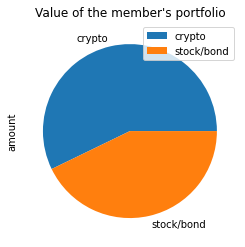

In [25]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart
# YOUR CODE HERE
savings_df.plot.pie(y="amount", title="Value of the member's portfolio")


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [26]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
emergency_fund_value = 3*monthly_income
emergency_fund_value

36000

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [27]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
# YOUR CODE HERE
# YOUR CODE HERE
# YOUR CODE HERE
amount_of_money_missing = total_portfolio - emergency_fund_value

if total_portfolio > emergency_fund_value:
    print("Congratulations you have enough money in this fund")
elif total_portfolio == emergency_fund_value:
    print("Congratulations you have riched an important financial goal")
else: 
    print(f"So sorry but you do not enough money yet, you are still missing ${amount_of_money_missing}")

Congratulations you have enough money in this fund


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



#### Step 1: Make an API call via the Alpaca SDK to get 10 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [28]:
# Set start and end dates of 10 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 10 years back from that date 
# YOUR CODE HERE
# YOUR CODE HERE
tickers = ["SPY", "AGG"]
timeframe = "1D"
start_date = pd.Timestamp("2011-04-27", tz="America/New_York").isoformat
end_date =  pd.Timestamp("2021-04-27", tz="America/New_York").isoformat

In [29]:
# Use the Alpaca get_barset function to make the API call to get the 10 years worth of pricing data
# The tickers and timeframe parameters should have been set in Part 1 of this activity 
# The start and end dates should be updated with the information set above
# Remember to add the df property to the end of the call so the response is returned as a DataFrame
# YOUR CODE HERE

ten_years_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Display both the first and last five rows of the DataFrame
# YOUR CODE HERE
# YOUR CODE HERE
display(ten_years_prices_df.head())
display(ten_years_prices_df.tail())

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2020-12-02 00:00:00-05:00  117.81  117.8100  117.5400  117.705  5554915   
2020-12-03 00:00:00-05:00  117.92  117.9800  117.7650  117.910  5210910   
2020-12-04 00:00:00-05:00  117.90  117.9000  117.5133  117.580  4821820   
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.750  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.770  3587353   

                              SPY                                      
                             open    high     low     close    volume  
time                                                                   
2020-12-02 00:00:00-05:00  364.82  366.96  364.20  366.7599  37323404  
2020-12-03 00:00:00-05:00  366.68  368.19  365.50  366.6698  52905586  
2020-12-04 00:00:00-05:00  367.32  369.85  367.22  369.8300  40264568  
2020-12-07 00:00:00-05:00  369.02  369.62  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.78  367.67  370.1599  32702217

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2021-04-21 00:00:00-04:00  114.60  114.7400  114.5300  114.74  5250384   
2021-04-22 00:00:00-04:00  114.74  114.8000  114.5900  114.77  3518947   
2021-04-23 00:00:00-04:00  114.81  115.0860  114.6415  114.75  3506457   
2021-04-26 00:00:00-04:00  114.74  114.8015  114.6500  114.65  2867784   
2021-04-27 00:00:00-04:00  115.13  115.1300  114.3700  114.37  3421667   

                              SPY                                      
                             open    high       low   close    volume  
time                                                                   
2021-04-21 00:00:00-04:00  411.51  416.29  411.3600  416.08  54772634  
2021-04-22 00:00:00-04:00  415.88  416.78  411.1300  412.30  90086341  
2021-04-23 00:00:00-04:00  412.87  418.25  412.7900  416.72  62184753  
2021-04-26 00:00:00-04:00  417.44  418.22  416.8111  417.64  44689009  
2021-04-27 00:00:00-04:00  417.91  418.14  416.3000  417.48  45962655

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [30]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_thirty_years = MCSimulation(
    portfolio_data = ten_years_prices_df,
    weights= [.60, .40],
    num_simulation = 500,
    num_trading_days = 252*30
) 

# Review the simulation input data
# YOUR CODE HERE
MC_thirty_years.portfolio_data.head()

AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2020-12-02 00:00:00-05:00  117.81  117.8100  117.5400  117.705  5554915   
2020-12-03 00:00:00-05:00  117.92  117.9800  117.7650  117.910  5210910   
2020-12-04 00:00:00-05:00  117.90  117.9000  117.5133  117.580  4821820   
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.750  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.770  3587353   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2020-12-02 00:00:00-05:00          NaN  364.82  366.96  364.20  366.7599   
2020-12-03 00:00:00-05:00     0.001742  366.68  368.19  365.50  366.6698   
2020-12-04 00:00:00-05:00    -0.002799  367.32  369.85  367.22  369.8300   
2020-12-07 00:00:00-05:00     0.001446  369.02  369.62  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.78  367.67  370.1599   

                                                  
                             volume daily_return  
time                                              
2020-12-02 00:00:00-05:00  37323404          NaN  
2020-12-03 00:00:00-05:00  52905586    -0.000246  
2020-12-04 00:00:00-05:00  40264568     0.008619  
2020-12-07 00:00:00-05:00  40456544    -0.001920  
2020-12-08 00:00:00-05:00  32702217     0.002817

In [31]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994645,1.002854,1.000160,1.002848,0.998585,1.002042,0.997206,0.998228,0.996781,0.999746,...,1.001158,1.005751,0.997300,0.999908,0.999579,1.001951,0.993876,1.001581,1.005411,0.995350
2,1.001926,1.007267,1.000387,1.002130,0.998653,1.007761,0.999584,1.001920,1.003459,1.004372,...,1.005478,1.006746,0.997385,0.996695,1.003318,0.995714,0.997296,1.003071,1.003968,0.995048
3,1.001618,1.005124,1.002274,1.000993,0.996284,1.006225,1.002189,1.005763,0.996479,0.996446,...,1.006385,1.011102,1.003770,0.999320,1.006459,0.991148,0.999556,0.996760,1.004303,0.996613
4,1.003476,1.004329,1.001387,1.002730,0.997557,1.010941,0.998453,1.011393,0.995299,0.994151,...,1.007083,1.010524,1.008238,1.006849,0.998283,0.986462,1.006919,0.989900,1.006968,0.991992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,11.625103,13.982674,12.076698,20.775549,17.299932,19.814708,14.363651,22.815562,21.674356,14.079214,...,12.753119,10.189382,14.278335,14.555596,20.814292,17.127717,13.274792,16.751491,7.254560,9.540591
7557,11.615782,13.929516,12.033068,20.684695,17.304525,19.662480,14.468526,22.675021,21.646290,14.089702,...,12.770379,10.195702,14.299770,14.521084,20.856569,17.177929,13.371262,16.755712,7.255960,9.558438
7558,11.630247,13.938077,12.051407,20.603225,17.212973,19.624240,14.467814,22.718510,21.700597,14.157366,...,12.770224,10.162044,14.313662,14.508296,20.833613,17.277832,13.342022,16.808615,7.235374,9.549427
7559,11.564606,13.884227,11.990885,20.618350,17.227872,19.547915,14.458499,22.671114,21.636275,14.109792,...,12.747897,10.181832,14.292140,14.502086,20.793044,17.226107,13.335885,16.841069,7.216535,9.555040


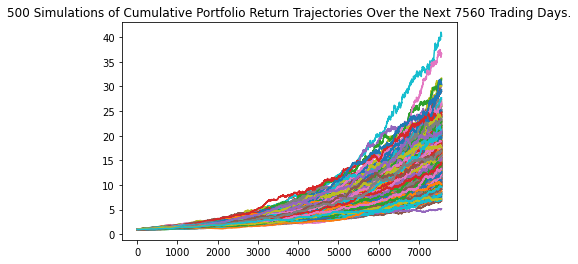

In [32]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_sim_line_plot = MC_thirty_years.plot_simulation()

MC_sim_line_plot.get_figure().savefig("MC_thirty_years_sim_plot.png", bbox_inches="tight")

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

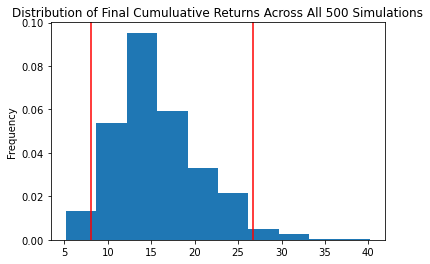

In [33]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_sim_dis_plot = MC_thirty_years.plot_distribution()
MC_sim_dis_plot.get_figure().savefig("MC_thirty_years_dis_plot.png", bbox_inches="tight")

#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [34]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE

MC_summary_statistics = MC_thirty_years.summarize_cumulative_return()
# Review the 30-year Monte Carlo summary statistics
# YOUR CODE HERE
print(MC_summary_statistics)

count           500.000000
mean             15.857083
std               5.050758
min               5.168521
25%              12.407844
50%              14.912641
75%              18.655717
max              40.198132
95% CI Lower      8.097815
95% CI Upper     26.663270
Name: 7560, dtype: float64


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [35]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(total_stocks_bonds)

60689.5


In [36]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = MC_summary_statistics[8] * total_stocks_bonds # YOUR CODE HERE
ci_upper_thirty_cumulative_return = MC_summary_statistics[9] * total_stocks_bonds # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
    f" over the next 30 years will end within in the range of"
    f" ${ci_lower_thirty_cumulative_return: .2f} and ${ci_upper_thirty_cumulative_return: .2f}.")


There is a 95% chance that an initial investment of $60689.5 in the portfolio over the next 30 years will end within in the range of $ 491452.35 and $ 1618180.50.


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [37]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE
MC_ten_years = MCSimulation(
    portfolio_data = ten_years_prices_df,
    weights= [.20, .80],
    num_simulation = 500,
    num_trading_days = 252*10
) 

# Review the simulation input data
# YOUR CODE HERE
MC_ten_years.portfolio_data.head()


AGG                                        \
                             open      high       low    close   volume   
time                                                                      
2020-12-02 00:00:00-05:00  117.81  117.8100  117.5400  117.705  5554915   
2020-12-03 00:00:00-05:00  117.92  117.9800  117.7650  117.910  5210910   
2020-12-04 00:00:00-05:00  117.90  117.9000  117.5133  117.580  4821820   
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.750  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.770  3587353   

                                           SPY                            \
                          daily_return    open    high     low     close   
time                                                                       
2020-12-02 00:00:00-05:00          NaN  364.82  366.96  364.20  366.7599   
2020-12-03 00:00:00-05:00     0.001742  366.68  368.19  365.50  366.6698   
2020-12-04 00:00:00-05:00    -0.002799  367.32  369.85  367.22  369.8300   
2020-12-07 00:00:00-05:00     0.001446  369.02  369.62  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.78  367.67  370.1599   

                                                  
                             volume daily_return  
time                                              
2020-12-02 00:00:00-05:00  37323404          NaN  
2020-12-03 00:00:00-05:00  52905586    -0.000246  
2020-12-04 00:00:00-05:00  40264568     0.008619  
2020-12-07 00:00:00-05:00  40456544    -0.001920  
2020-12-08 00:00:00-05:00  32702217     0.002817

In [38]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE
MC_ten_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.994585,0.994836,1.009794,0.995536,1.011554,1.012894,0.993655,0.995431,1.005055,0.998681,...,0.991622,1.000702,1.009521,0.992616,1.000475,1.009281,0.994781,1.006685,0.987938,1.006760
2,1.001763,0.986053,1.010946,0.991270,0.995278,1.025041,0.998981,0.998046,1.010822,0.999493,...,0.994568,0.993370,1.011086,1.000781,1.009329,1.018902,1.007620,1.013302,0.983232,1.012356
3,0.996226,0.988255,1.015051,0.987940,0.980119,1.032847,0.998722,0.996958,1.014025,1.000395,...,0.992146,0.987496,1.022729,1.008206,1.002207,1.018510,1.003866,1.022186,0.977532,1.014907
4,0.999129,0.985933,1.028858,0.985520,0.974813,1.028153,1.006805,0.988419,1.026084,0.999596,...,0.990936,0.987135,1.033853,1.011103,0.999662,1.012545,1.020077,1.004769,0.976974,1.015302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.137746,9.222553,24.816925,12.362604,14.821643,14.315350,9.392127,11.628609,14.017804,17.000125,...,5.848709,18.883243,6.106191,10.245972,16.430624,11.672435,21.094141,21.245792,19.811210,21.506070
2517,6.058966,9.284902,25.028574,12.400771,14.639519,14.453230,9.388564,11.522219,13.817335,17.119496,...,5.830896,18.977373,6.087018,10.269466,16.343787,11.695755,21.449380,21.481645,19.842627,21.780834
2518,6.058994,9.378915,25.383539,12.316807,14.547285,14.471511,9.371804,11.543580,13.932429,16.940006,...,5.778741,19.028090,6.075776,10.251407,16.567544,11.607053,21.746848,21.429216,19.777745,21.864017
2519,6.047106,9.433243,25.116526,12.390862,14.640537,14.402131,9.360028,11.459227,13.924870,16.981225,...,5.826921,19.077043,6.082542,10.161197,16.570765,11.472943,21.512332,21.461008,19.936925,21.849304


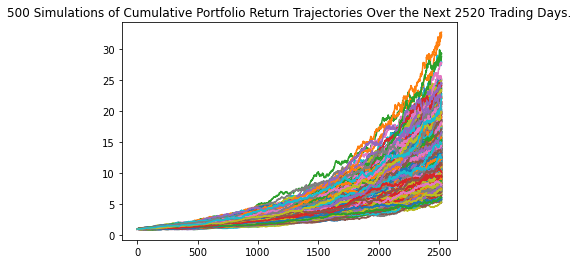

In [39]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
MC_ten_sim_line_plot = MC_ten_years.plot_simulation()

MC_ten_sim_line_plot.get_figure().savefig("MC_ten_years_sim_plot.png", bbox_inches="tight")

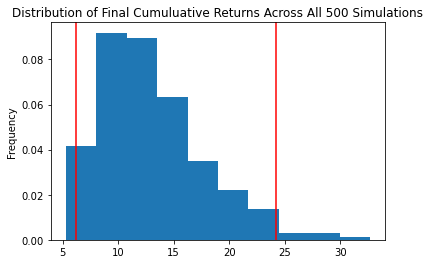

In [40]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE
MC_10_sim_dis_plot = MC_ten_years.plot_distribution()
MC_10_sim_dis_plot.get_figure().savefig("MC_ten_years_dis_plot.png", bbox_inches="tight")

In [41]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
MC_summary_statistics_ten_years = MC_ten_years.summarize_cumulative_return()


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE
print(MC_summary_statistics_ten_years)


count           500.000000
mean             13.047428
std               4.685599
min               5.271966
25%               9.611935
50%              12.270905
75%              15.287205
max              32.702464
95% CI Lower      6.231038
95% CI Upper     24.226663
Name: 2520, dtype: float64


### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [42]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
print(total_stocks_bonds)

60689.5


In [43]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return =  MC_summary_statistics_ten_years[8] * total_stocks_bonds # YOUR CODE HERE
ci_upper_ten_cumulative_return = MC_summary_statistics_ten_years[9] * total_stocks_bonds # YOUR CODE HERE



# Print the result of your calculations
# YOUR CODE HERE
print(f"There is a 95% chance that an initial investment of ${total_stocks_bonds} in the portfolio"
    f" over the next 30 years will end within in the range of"
    f" ${ci_lower_ten_cumulative_return: .2f} and ${ci_upper_ten_cumulative_return: .2f}.")


There is a 95% chance that an initial investment of $60689.5 in the portfolio over the next 30 years will end within in the range of $ 378158.61 and $ 1470304.05.


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?